In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

* call load_digits method to load training method

In [5]:
digits = load_digits()

* Explore what this training set contains

In [6]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

* print the first one its 'data'

In [8]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

* print the images

<Figure size 432x288 with 0 Axes>

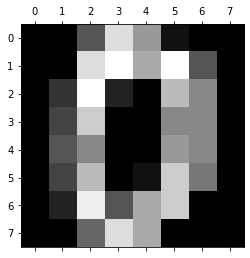

In [10]:
plt.gray()
plt.matshow(digits.images[0])

##### print first 5 samles

<Figure size 432x288 with 0 Axes>

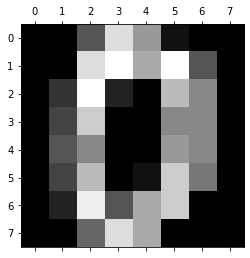

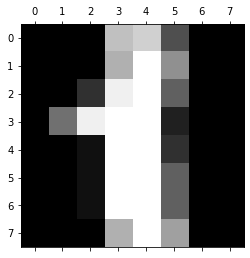

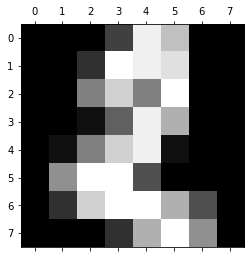

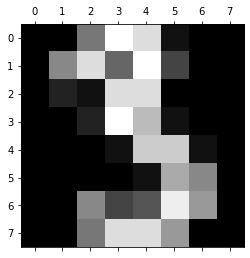

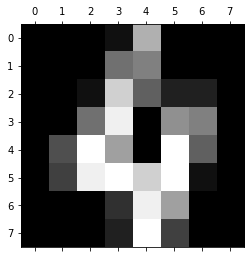

In [11]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [12]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

* it means first image is 0 and 4 means 5th image 

##### we have to use 'data' and 'target' to train model

In [15]:
from sklearn.model_selection import train_test_split
model =train_test_split(digits.data,digits.target)

In [17]:
X_train, X_test, y_train, y_test =train_test_split(digits.data,digits.target,test_size=0.2)
# test_size=0.2 ---> supply test % to 20 and 80 % to training

In [18]:
len(X_train)

1437

In [19]:
len(X_test)

360

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [24]:
model.fit(X_train,y_train)

c:\users\balu\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

* X_train has Hand written characters on the image

In [25]:
model.score(X_test,y_test)

0.9777777777777777

* Pickup random samples

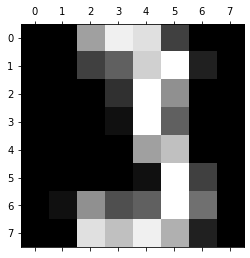

In [26]:
plt.matshow(digits.images[60])

In [29]:
digits.target[60]

3

* this is Index 3
#### Predict for this 3

In [33]:
model.predict([digits.data[60]])

array([3])

In [35]:
# prdict 0 to 5
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

#### Check where the model is failing (acuracy)

In [40]:
y_predicted =model.predict(X_test)
from sklearn.metrics import confusion_matrix

In [41]:
cm = confusion_matrix(y_test,y_predicted)
# y_test --> Tructh ,   y_predicted -- > Predicted
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0, 29,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 36,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]], dtype=int64)

* visualize

Text(69.0, 0.5, 'Truth')

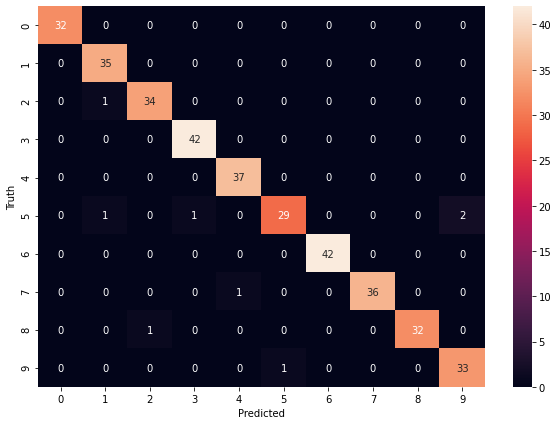

In [45]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")